In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_stata("/users/quasar/downloads/Dataset/Master_thesis_data/JEDC_dataset/10SD_jan15.dta")
df

,Country,Regioncode,Region,Variable,Year,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
0,BWA,SSA,Sub-saharan Africa,VA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BWA,SSA,Sub-saharan Africa,VA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BWA,SSA,Sub-saharan Africa,VA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BWA,SSA,Sub-saharan Africa,VA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BWA,SSA,Sub-saharan Africa,VA,1964,16.30,3.49,0.74,0.10,0.66,6.24,1.66,1.12,4.82,2.34,37.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,EGY,MENA,Middle East and North Africa,EMP,2008,"5,225.14",31.98,"2,500.13",289.87,"2,376.25","2,814.70","1,806.55",749.22,"5,246.05",NaN,"21,039.90"
7552,EGY,MENA,Middle East and North Africa,EMP,2009,"5,218.60",30.56,"2,541.43",301.08,"2,662.40","3,012.24","1,898.16",784.55,"5,414.84",NaN,"21,863.86"
7553,EGY,MENA,Middle East and North Africa,EMP,2010,"5,205.53",29.00,"2,435.55",307.27,"2,732.95","2,977.06","1,992.27",801.30,"5,538.95",NaN,"22,019.88"
7554,EGY,MENA,Middle East and North Africa,EMP,2011,"5,185.92",27.56,"2,373.81",318.00,"2,795.26","3,020.24","2,048.33",814.74,"5,635.52",NaN,"22,219.39"


In [5]:
df.set_index(['Country','Year']).head()

Regioncode              Region Variable   AGR  MIN  MAN   PU  CON  WRT  TRA  FIRE  GOV  OTH   SUM
Country Year                                                                                                  
BWA     1960        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1961        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1962        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1963        SSA  Sub-saharan Africa       VA   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN
        1964        SSA  Sub-saharan Africa       VA 16.30 3.49 0.74 0.10 0.66 6.24 1.66  1.12 4.82 2.34 37.48

In [6]:
df_emp = df.loc[df.Variable == 'EMP']
df_VA = df.loc[df.Variable == 'VA']

df_VA['agri'] = df_VA.AGR
df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN
df_VA['service'] = df_VA.PU + df_VA.CON + df_VA.WRT + df_VA.TRA + df_VA.FIRE + df_VA.GOV + df_VA.OTH
df_VA['agri_share'] = df_VA.AGR / df_VA.SUM
df_VA['manu_share'] = df_VA.manufacturing / df_VA.SUM
df_VA['service_share'] = df_VA.service / df_VA.SUM

df_emp['agri'] = df_emp.AGR
df_emp['manufacturing'] = df_emp.MIN + df_emp.MAN
df_emp['service'] = df_emp.PU + df_emp.CON + df_emp.WRT + df_emp.TRA + df_emp.FIRE + df_emp.GOV + df_emp.OTH
df_emp['agri_share'] = df_emp.AGR / df_emp.SUM
df_emp['manu_share'] = df_emp.manufacturing / df_emp.SUM
df_emp['service_share'] = df_emp.service / df_emp.SUM

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1860/1146145816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['agri'] = df_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1860/1146145816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA['manufacturing'] = df_VA.MIN + df_VA.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_1860/1146145816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [7]:
df_emp_ind = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1980) & (df_emp['Year'] <=2005)]
df_emp_ind = df_emp_ind.set_index('Year')
df_emp_ind.head()

,Country,Regioncode,Region,Variable,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM,agri,manufacturing,service,agri_share,manu_share,service_share
Year,,,,,,,,,,,,,,,,,,,,,
1980,IND,ASI,Asia,EMP,"188,501.92","1,007.76","23,738.83",762.01,"3,044.82","13,289.43","6,400.05",992.67,"15,348.25","7,264.26","260,350.01","188,501.92","24,746.58","47,101.50",0.72,0.10,0.18
1981,IND,ASI,Asia,EMP,"192,718.30","1,127.86","24,983.46",778.70,"3,311.06","14,285.44","6,581.98","1,010.16","15,284.97","7,590.09","267,672.01","192,718.30","26,111.32","48,842.39",0.72,0.10,0.18
1982,IND,ASI,Asia,EMP,"196,688.84","1,249.47","25,836.52",787.13,"3,241.21","15,188.25","6,696.75","1,054.82","16,416.47","7,949.05","275,108.50","196,688.84","27,085.99","51,333.67",0.71,0.10,0.19
1983,IND,ASI,Asia,EMP,"200,667.76","1,270.06","27,554.14",801.56,"3,558.96","16,087.33","6,943.76","1,089.10","16,492.89","8,166.88","282,632.45","200,667.76","28,824.21","53,140.48",0.71,0.10,0.19
1984,IND,ASI,Asia,EMP,"204,459.46","1,278.26","28,426.08",837.62,"3,786.30","16,863.54","7,365.24","1,127.42","17,618.37","8,449.96","290,212.26","204,459.46","29,704.35","56,048.45",0.70,0.10,0.19


<AxesSubplot:title={'center':'India Labour share'}, xlabel='Year'>

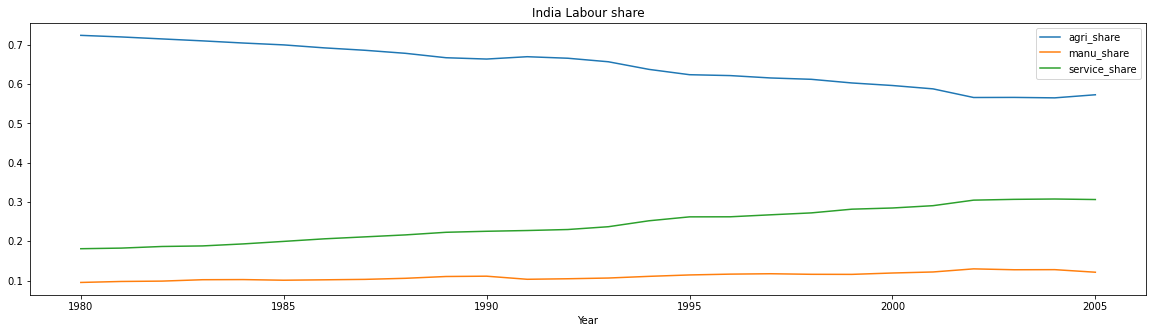

In [8]:
df_emp_ind[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title= 'India Labour share')

In [9]:
df_VA_ind = df_VA.loc[(df_VA['Country'] == 'IND') & (df_VA['Year'] >= 1980) & (df_VA['Year'] <= 2005)]
df_VA_ind = df_VA_ind.set_index('Year')

In [10]:
df_VA_Q05 = df.loc[df.Variable == 'VA_Q05']
df_VA_Q05_ind = df_VA_Q05.loc[(df_VA_Q05['Country'] == 'IND') & (df_VA_Q05['Year'] >= 1980) & (df_VA_Q05['Year'] <= 2005)]
df_VA_Q05_ind = df_VA_Q05_ind.set_index('Year')
df_VA_Q05_ind.head()

df_VA_Q05_ind['agri_const'] = df_VA_Q05_ind.AGR
df_VA_Q05_ind['manufacturing_const'] = df_VA_Q05_ind.MIN + df_VA_Q05_ind.MAN
df_VA_Q05_ind['service_const'] = df_VA_Q05_ind.PU + df_VA_Q05_ind.CON + df_VA_Q05_ind.WRT + df_VA_Q05_ind.TRA + df_VA_Q05_ind.FIRE + df_VA_Q05_ind.GOV + df_VA_Q05_ind.OTH
df_VA_Q05_ind['agri_share_const'] = df_VA_Q05_ind.AGR / df_VA_Q05_ind.SUM
df_VA_Q05_ind['manu_share_const'] = df_VA_Q05_ind.manufacturing_const / df_VA_Q05_ind.SUM
df_VA_Q05_ind['service_share_const'] = df_VA_Q05_ind.service_const / df_VA_Q05_ind.SUM

agri_productivity_ind_constant =  (df_VA_Q05_ind['agri_const'] * 1000000) / (df_emp_ind['agri'] * 1000) 
manu_productivity_ind_constant =  (df_VA_Q05_ind['manufacturing_const'] * 1000000) / (df_emp_ind['manufacturing'] * 1000) 
service_productivity_ind_constant =  (df_VA_Q05_ind['service_const'] * 1000000) / (df_emp_ind['service'] * 1000) 

ind_prod_const = pd.DataFrame([agri_productivity_ind_constant, 
                              manu_productivity_ind_constant, 
                              service_productivity_ind_constant])
ind_prod_const = ind_prod_const.T
ind_prod_const.head()

,0,1,2
Year,,,
1980,"16,229.99","55,250.72","74,364.72"
1981,"16,796.12","57,064.89","75,331.19"
1982,"16,253.89","59,102.89","75,200.34"
1983,"17,655.35","60,302.44","76,505.53"
1984,"17,321.52","61,815.98","77,319.80"


In [11]:
agri_productivity_ind =  (df_VA_ind['agri'] * 1000000) / (df_emp_ind['agri'] * 1000) 
manu_productivity_ind =  (df_VA_ind['manufacturing'] * 1000000) / (df_emp_ind['manufacturing'] * 1000) 
service_productivity_ind =  (df_VA_ind['service'] * 1000000) / (df_emp_ind['service'] * 1000) 

ind_prod = pd.DataFrame([agri_productivity_ind, manu_productivity_ind, service_productivity_ind])
ind_prod = ind_prod.T
ind_prod.head()

,agri,manufacturing,service
Year,,,
1980,"2,581.11","10,211.08","11,516.25"
1981,"2,850.98","11,909.84","13,139.61"
1982,"2,977.42","12,960.78","14,394.62"
1983,"3,508.30","14,228.40","16,022.47"
1984,"3,670.24","15,531.93","17,619.45"


In [12]:
price_ind = pd.DataFrame([agri_productivity_ind, manu_productivity_ind, service_productivity_ind, 
                              agri_productivity_ind_constant, manu_productivity_ind_constant, service_productivity_ind_constant])
price_ind = price_ind.T
price_ind.head()

,agri,manufacturing,service,Unnamed 0,Unnamed 1,Unnamed 2
Year,,,,,,
1980,"2,581.11","10,211.08","11,516.25","16,229.99","55,250.72","74,364.72"
1981,"2,850.98","11,909.84","13,139.61","16,796.12","57,064.89","75,331.19"
1982,"2,977.42","12,960.78","14,394.62","16,253.89","59,102.89","75,200.34"
1983,"3,508.30","14,228.40","16,022.47","17,655.35","60,302.44","76,505.53"
1984,"3,670.24","15,531.93","17,619.45","17,321.52","61,815.98","77,319.80"


In [13]:
price_ind['agri_price'] = price_ind['agri'] / price_ind['Unnamed 0']
price_ind['manu_price'] = price_ind['manufacturing'] / price_ind['Unnamed 1']
price_ind['service_price'] = price_ind['service'] / price_ind['Unnamed 2']
price_ind.head()

,agri,manufacturing,service,Unnamed 0,Unnamed 1,Unnamed 2,agri_price,manu_price,service_price
Year,,,,,,,,,
1980,"2,581.11","10,211.08","11,516.25","16,229.99","55,250.72","74,364.72",0.16,0.18,0.15
1981,"2,850.98","11,909.84","13,139.61","16,796.12","57,064.89","75,331.19",0.17,0.21,0.17
1982,"2,977.42","12,960.78","14,394.62","16,253.89","59,102.89","75,200.34",0.18,0.22,0.19
1983,"3,508.30","14,228.40","16,022.47","17,655.35","60,302.44","76,505.53",0.20,0.24,0.21
1984,"3,670.24","15,531.93","17,619.45","17,321.52","61,815.98","77,319.80",0.21,0.25,0.23


<AxesSubplot:title={'center':'Sectoral Productivity India'}, xlabel='Year'>

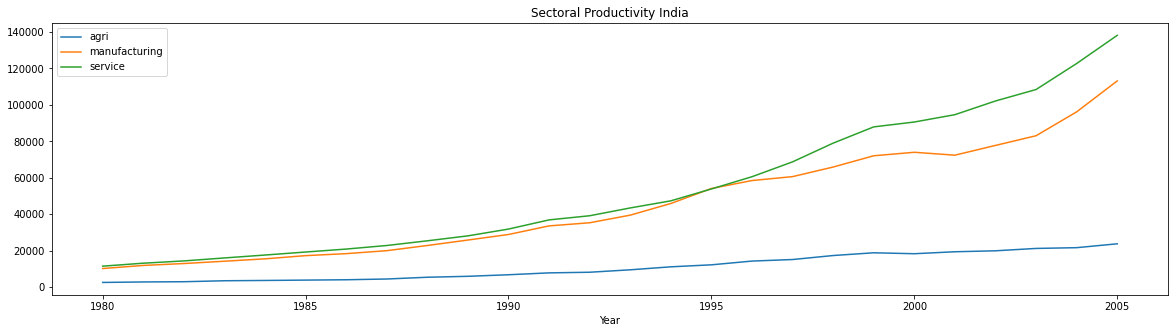

In [14]:
ind_prod.plot(figsize =(20, 5), title ='Sectoral Productivity India')

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")

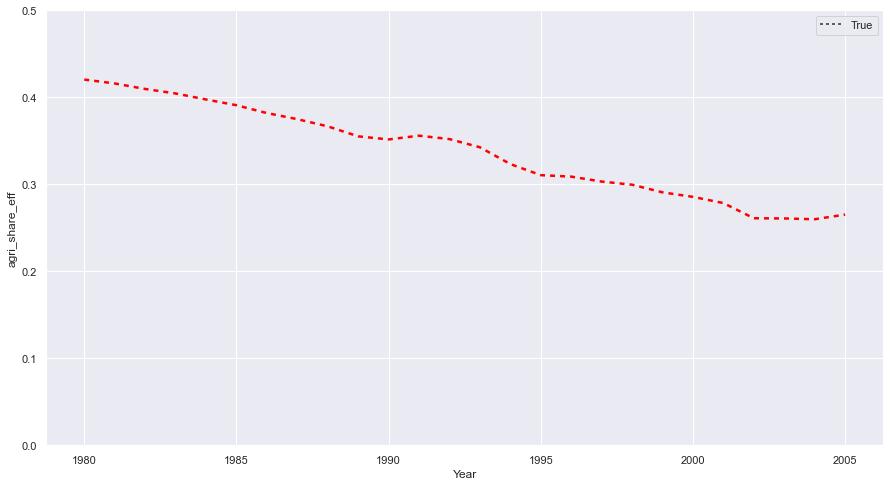

In [16]:
# use human capital ratio from table 1 to calculate values below 
df_ind_eff = df_emp.loc[(df_emp['Country'] == 'IND') & (df_emp['Year'] >= 1980) & (df_emp['Year'] <= 2005), ['Year', 'AGR', 'MIN','MAN','PU','CON','WRT','TRA','FIRE','GOV','OTH','agri_share']]
df_ind_eff['agri_eff'] = df_ind_eff.AGR
df_ind_eff['manufacturing_eff'] = (df_ind_eff.MIN + df_ind_eff.MAN) * 2.56
df_ind_eff['service_eff'] = (df_ind_eff.PU + df_ind_eff.CON + df_ind_eff.WRT + df_ind_eff.TRA + df_ind_eff.FIRE + df_ind_eff.GOV + df_ind_eff.OTH) * 4.17 
df_ind_eff['total_eff'] = df_ind_eff['agri_eff'] + df_ind_eff['manufacturing_eff'] + df_ind_eff['service_eff']
df_ind_eff['agri_share_eff'] = df_ind_eff.agri_eff / df_ind_eff.total_eff
df_ind_eff['manu_share_eff'] = df_ind_eff.manufacturing_eff / df_ind_eff.total_eff
df_ind_eff['service_share_eff'] = df_ind_eff.service_eff / df_ind_eff.total_eff

plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="agri_share_eff", data= df_ind_eff, 
             color = 'red', linewidth = 2.5, style=True, dashes=[(2,2)])
plt.ylim(0, 0.5)
plt.show()

In [17]:
df_ind_eff.set_index('Year').head()

,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,agri_share,agri_eff,manufacturing_eff,service_eff,total_eff,agri_share_eff,manu_share_eff,service_share_eff
Year,,,,,,,,,,,,,,,,,,
1980,"188,501.92","1,007.76","23,738.83",762.01,"3,044.82","13,289.43","6,400.05",992.67,"15,348.25","7,264.26",0.72,"188,501.92","63,351.25","196,413.25","448,266.43",0.42,0.14,0.44
1981,"192,718.30","1,127.86","24,983.46",778.70,"3,311.06","14,285.44","6,581.98","1,010.16","15,284.97","7,590.09",0.72,"192,718.30","66,844.97","203,672.77","463,236.04",0.42,0.14,0.44
1982,"196,688.84","1,249.47","25,836.52",787.13,"3,241.21","15,188.25","6,696.75","1,054.82","16,416.47","7,949.05",0.71,"196,688.84","69,340.14","214,061.40","480,090.38",0.41,0.14,0.45
1983,"200,667.76","1,270.06","27,554.14",801.56,"3,558.96","16,087.33","6,943.76","1,089.10","16,492.89","8,166.88",0.71,"200,667.76","73,789.97","221,595.81","496,053.54",0.40,0.15,0.45
1984,"204,459.46","1,278.26","28,426.08",837.62,"3,786.30","16,863.54","7,365.24","1,127.42","17,618.37","8,449.96",0.70,"204,459.46","76,043.13","233,722.03","514,224.63",0.40,0.15,0.45


In [18]:
# from paper
hm_ha = 2.56
hs_ha = 4.17

ind_prod['tau_m'] = 1 - ((ind_prod['agri']/ ind_prod['manufacturing']) * hm_ha)
ind_prod['tau_s'] = 1 - ((ind_prod['agri']/ ind_prod['service']) * hs_ha)
ind_prod.head()

,agri,manufacturing,service,tau_m,tau_s
Year,,,,,
1980,"2,581.11","10,211.08","11,516.25",0.35,0.07
1981,"2,850.98","11,909.84","13,139.61",0.39,0.10
1982,"2,977.42","12,960.78","14,394.62",0.41,0.14
1983,"3,508.30","14,228.40","16,022.47",0.37,0.09
1984,"3,670.24","15,531.93","17,619.45",0.40,0.13


In [19]:
ind_prod['tau_m_unadj'] = 1 - ((ind_prod['agri']/ ind_prod['manufacturing']))
ind_prod['tau_s_unadj'] = 1 - ((ind_prod['agri']/ ind_prod['service']))
ind_prod

,agri,manufacturing,service,tau_m,tau_s,tau_m_unadj,tau_s_unadj
Year,,,,,,,
1980,"2,581.11","10,211.08","11,516.25",0.35,0.07,0.75,0.78
1981,"2,850.98","11,909.84","13,139.61",0.39,0.10,0.76,0.78
1982,"2,977.42","12,960.78","14,394.62",0.41,0.14,0.77,0.79
1983,"3,508.30","14,228.40","16,022.47",0.37,0.09,0.75,0.78
1984,"3,670.24","15,531.93","17,619.45",0.40,0.13,0.76,0.79
1985,"3,864.72","17,287.80","19,269.86",0.43,0.16,0.78,0.80
1986,"4,058.29","18,383.40","20,897.97",0.43,0.19,0.78,0.81
1987,"4,469.08","20,015.25","22,850.46",0.43,0.18,0.78,0.80
1988,"5,436.25","22,854.37","25,426.71",0.39,0.11,0.76,0.79


In [20]:
# use for 5 equation and 5 unknown solution 
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve

# data for 1980 

# from literature  
lambda_a = 0.1
lambda_m = 0.15
lambda_s = 0.75
rho = 0.5

# from calculation in paper for 1980 - formula is given in paper - follow difference procedure for India comparing US
tau_m = 0.35
tau_s = 0.07

pa_pm_data = 0.16/0.18
ps_pm_data = 0.15/0.18

n_a = 0.42
n_m = 0.14
n_s = 0.44

ca_bar, cs_bar, A_a, A_m, A_s = symbols('ca_bar, cs_bar, A_a, A_m, A_s', real=True)

# equal to zero below 
nonlinsolve([ 
          pa_pm_data - ((1 - tau_m) * (A_m/A_a)), 
          ps_pm_data - (((1-tau_m)/(1-tau_s)) * (A_m/A_s)), 
          #((A_a * n_a - ca_bar) / (A_m * n_m)) - ((lambda_a / lambda_m) * (1/pa_pm_data)**rho),
          #((A_s * n_s + cs_bar) / (A_m * n_m)) - ((lambda_s / lambda_m) * (1/ps_pm_data)**rho),
          
          ((A_a*n_a-ca_bar) / (A_m * n_m)) - ((lambda_a/lambda_m) * ((A_a/A_m)/(1-tau_m))**rho), 
          ((A_s*n_s+cs_bar) / (A_m * n_m)) - ((lambda_s/lambda_m) * ((A_s*(1-tau_s)) / (A_m *(1-tau_m)))**rho),
          # n_a - (ca_bar/A_a) - ( (1 + (cs_bar/A_s) - (ca_bar/A_a)) / ( 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          n_a + n_m + n_s - 1,
          # n_a - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          ],  
          [ca_bar, cs_bar, A_a, A_m, A_s])

{(0.523229939042032*cs_bar, cs_bar, 1.8383308501545*cs_bar, 2.51395671816*cs_bar, 2.10847982813419*cs_bar)}

In [21]:
df_ind_eff = df_ind_eff.set_index('Year')

In [22]:
A_a = 1.8383308501545 * 1552.7 
A_m = 2.51395671816 * 1552.7
A_s = 2.10847982813419 * 1552.7

ca_bar, cs_bar, A_a, A_m, A_s = symbols('ca_bar, cs_bar, A_a, A_m, A_s', real=True)

# equal to zero below 
nonlinsolve([ 
          pa_pm_data - ((1 - tau_m) * (A_m/A_a)), 
          ps_pm_data - (((1 - tau_m)/(1- tau_s)) * (A_m/A_s)), 
          ((A_a * n_a - ca_bar) / (A_m * n_m)) - ((lambda_a / lambda_m) * (1/pa_pm_data)**rho),
          ((A_s * n_s + cs_bar) / (A_m * n_m)) - ((lambda_s / lambda_m) * (1/ps_pm_data)**rho),
          
          #((A_a * n_a - ca_bar) / (A_m * n_m)) - ( (lambda_a / lambda_m) * ( ( A_a /A_m)/(1-tau_m) )**rho ), 
          #((A_s * n_s + cs_bar) / (A_m * n_m)) - ( (lambda_s / lambda_m) * ( ( A_s * (1-tau_s)) / (A_m *(1-tau_m)) )**rho ),
          # n_a - (ca_bar/A_a) - ( (1 + (cs_bar/A_s) - (ca_bar/A_a)) / ( 1 + ((lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          n_a + n_m + n_s - 1,
          #n_a - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m)**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s)**rho) * ((A_a/A_s)**(1-rho))))),
          ],  
          [ca_bar, cs_bar, A_a, A_m, A_s])

{(0.523229939042032*cs_bar, cs_bar, 1.8383308501545*cs_bar, 2.51395671816*cs_bar, 2.10847982813419*cs_bar)}

In [23]:
cs_bar = 1552.7
ca_bar = cs_bar*0.523229939042032
A_a_1980 = cs_bar*1.8383308501545
A_m_1980 = cs_bar*2.51395671816
A_s_1980 = cs_bar*2.10847982813419
A_a_1980, A_m_1980, A_s_1980

(2854.3763110348923, 3903.4205962870324, 3273.836629143957)

In [24]:
cs_bar = 1552.7
ca_bar = cs_bar*0.523229939042032

A_a, A_m, A_s = symbols('A_a, A_m, A_s', real=True)

n_a = df_ind_eff.agri_share_eff
n_m = df_ind_eff.manu_share_eff
n_s = df_ind_eff.service_share_eff

tau_m = ind_prod.tau_m
tau_s = ind_prod.tau_s

pa_pm_data = price_ind.agri_price / price_ind.manu_price
ps_pm_data = price_ind.service_price / price_ind.manu_price

parameters = pd.DataFrame(index=df_ind_eff.index, columns = ['A_a', 'A_m', 'A_s'])
parameters.iloc[0]['A_a'] = A_a_1980
parameters.iloc[0]['A_m'] = A_m_1980
parameters.iloc[0]['A_s'] = A_s_1980

# equal to zero below 

for i in range(1, len(df_ind_eff.index)):
          parameter = list(nonlinsolve([ 
                    pa_pm_data.iloc[i] - ((1 - tau_m.iloc[i]) * (A_m/A_a)), 
                    ps_pm_data.iloc[i] - (((1 - tau_m.iloc[i])/(1- tau_s.iloc[i])) * (A_m/A_s)),
                    #((A_a * n_a.iloc[i] - ca_bar) / (A_m * n_m.iloc[i])) - ((lambda_a / lambda_m) * ((A_a/A_m)/(1-tau_m.iloc[i]))**rho), 
                    #((A_s * n_s.iloc[i] + cs_bar) / (A_m * n_m.iloc[i])) - ((lambda_s / lambda_m) * ((A_s*(1-tau_s.iloc[i])) / (A_m *(1-tau_m.iloc[i])) )**rho),
                    n_a.iloc[i] - (ca_bar/A_a) - ((1 + (cs_bar / A_s) - (ca_bar/ A_a)) / (1 + ( (lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho) * ((A_a/A_m)**(1-rho)) ) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) * ((A_a/A_s)**(1-rho))))),
                    ],  
                    [A_a, A_m, A_s]))
          parameters.iloc[i]['A_a'] = parameter[0][0]
          parameters.iloc[i]['A_m'] = parameter[0][1]
          parameters.iloc[i]['A_s'] = parameter[0][2]

In [25]:
parameters["A_a"] = parameters.A_a.astype(float)
parameters["A_m"] = parameters.A_m.astype(float)
parameters["A_s"] = parameters.A_s.astype(float)

parameters

,A_a,A_m,A_s
Year,,,
1980,"2,854.38","3,903.42","3,273.84"
1981,"2,909.19","3,860.93","3,128.97"
1982,"3,005.16","4,268.54","3,334.22"
1983,"3,017.40","4,025.80","3,135.55"
1984,"3,125.87","4,357.59","3,346.11"
1985,"3,234.28","4,728.99","3,562.70"
1986,"3,378.36","5,320.47","3,895.76"
1987,"3,472.43","5,695.98","4,109.44"
1988,"3,495.11","5,212.42","3,683.51"


In [35]:
parameters.pct_change().mean()

A_a   0.04
A_m   0.05
A_s   0.05
dtype: float64

In [ ]:
n_a_calc = pd.DataFrame(index=df_ind_eff.index, columns = ['agri_share_calc', 'const_agri_TFP', 'const_non_agri_TFP', 'data'])

for i in range(0, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[i]['A_s']) - (ca_bar/ parameters.iloc[i]['A_a']))
          term_2 = ca_bar / parameters.iloc[i]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho )*((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) *((parameters.iloc[i]['A_a']/parameters.iloc[i]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['agri_share_calc'] = n_a

In [ ]:
# Constant agri TFP
# A_a = parameters.iloc[1]['A_a']
for i in range(0, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[i]['A_s']) - (ca_bar/ parameters.iloc[0]['A_a']))
          term_2 = ca_bar / parameters.iloc[0]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho )*((parameters.iloc[0]['A_a']/parameters.iloc[i]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) *((parameters.iloc[0]['A_a']/parameters.iloc[i]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['const_agri_TFP'] = n_a

In [ ]:
# Constant non-agri TFP
for i in range(0, len(df_ind_eff.index)):
          term_1 = (1 + (cs_bar / parameters.iloc[0]['A_s']) - (ca_bar/ parameters.iloc[i]['A_a']))
          term_2 = ca_bar / parameters.iloc[i]['A_a']
          term_3 = 1 + ((lambda_m/lambda_a) * ((1 - tau_m.iloc[i])**rho)*((parameters.iloc[i]['A_a']/parameters.iloc[0]['A_m'])**(1-rho))) + ((lambda_s/lambda_a) * ((1 - tau_s.iloc[i])**rho) *((parameters.iloc[i]['A_a']/parameters.iloc[0]['A_s'])**(1-rho)))
          n_a = (term_1 / term_3) + term_2
          n_a_calc.iloc[i]['const_non_agri_TFP'] = n_a

In [ ]:
n_a_calc['data'] = df_ind_eff.agri_share_eff
n_a_calc

,agri_share_calc,const_agri_TFP,const_non_agri_TFP,data
Year,,,,
1980,0.42,0.42,0.42,0.42
1981,0.42,0.42,0.42,0.42
1982,0.41,0.43,0.41,0.41
1983,0.40,0.42,0.40,0.40
1984,0.40,0.43,0.40,0.40
1985,0.39,0.43,0.39,0.39
1986,0.38,0.43,0.38,0.38
1987,0.37,0.43,0.37,0.37
1988,0.37,0.42,0.36,0.37


In [ ]:
n_a_calc = n_a_calc.dropna()

Text(0.5, 1.0, 'Share of labor in agriculture with counterfactual TFP for India')

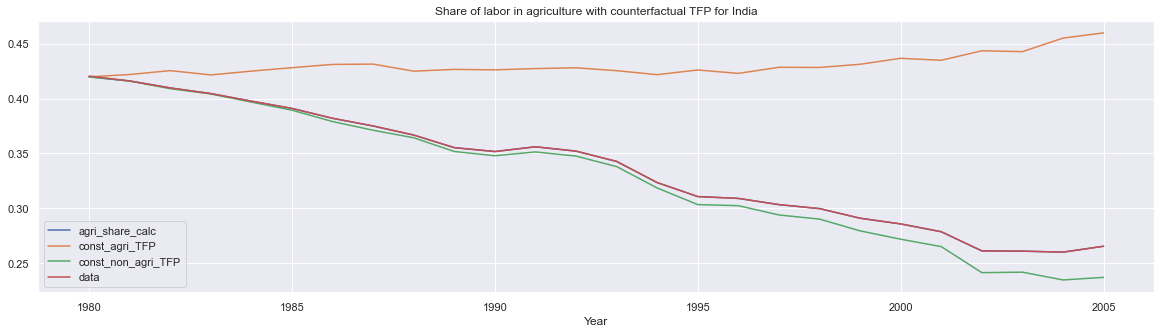

In [ ]:
n_a_calc.plot(figsize=(20,5))
plt.title("Share of labor in agriculture with counterfactual TFP for India")

In [ ]:
"""
# create excel writer
writer = pd.ExcelWriter('/users/quasar/downloads/calibration_result.xlsx')
# write dataframe to excel sheet named 'marks'
parameters.to_excel(writer, 'Sectoral TFP Time Series')
n_a_calc.to_excel(writer, 'Agri Labour share')
# save the excel file
writer.save()
"""

"\n# create excel writer\nwriter = pd.ExcelWriter('/users/quasar/downloads/calibration_result.xlsx')\n# write dataframe to excel sheet named 'marks'\nparameters.to_excel(writer, 'Sectoral TFP Time Series')\nn_a_calc.to_excel(writer, 'Agri Labour share')\n# save the excel file\nwriter.save()\n"

1. Do the entire exercise (JEDC related) with data until recent time point
2. Do the plots setting tau=0 and interpret them as distortion free economy
3. Aggregate growth implication of the counterfactuals